## Importación de librerias

In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model

## Preparación del dataframe de trabajo

In [30]:
datos_original= pd.read_csv('SPY.csv', sep=';')

# Selecciona una fila cada 5 filas
datos_reducido = datos_original.iloc[::5]

# Cambio el tipo de datos de timestamp a datetime
datos_reducido.loc[:, 'timestamp'] = pd.to_datetime(datos_reducido['timestamp'],dayfirst=True)
datos_reducido.info()
print(datos_reducido.head(5))
# ordenar el dataframe por timestamp
datos = datos_reducido.sort_values(by='timestamp')

# Cambiar el nombre de timestamp
datos.rename(columns={'timestamp': 'fecha'}, inplace=True)
# Quitar columnas innecesarias
datos = datos[['fecha', 'adjusted_close']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       1007 non-null   object 
 1   open            1007 non-null   float64
 2   high            1007 non-null   float64
 3   low             1007 non-null   float64
 4   close           1007 non-null   float64
 5   adjusted_close  1007 non-null   float64
 6   volume          1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB
              timestamp      open      high       low   close  adjusted_close  \
0   2020-03-19 00:00:00  239.2500  247.3800  232.2200  240.51          240.51   
5   2020-03-12 00:00:00  256.0000  266.6600  247.6800  248.11          248.11   
10  2020-03-05 00:00:00  304.9800  308.4700  300.0100  302.46          302.46   
15  2020-02-27 00:00:00  305.4600  311.5637  297.5100  297.51          297.51   
20  2020-02-20 00:00:

In [31]:
datos.info()
datos

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 5030 to 0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           1007 non-null   object 
 1   adjusted_close  1007 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.6+ KB


,fecha,adjusted_close
5030,2000-03-21 00:00:00,102.7969
5025,2000-03-28 00:00:00,104.0888
5020,2000-04-04 00:00:00,103.4428
5015,2000-04-11 00:00:00,103.6366
5010,2000-04-18 00:00:00,99.5454
...,...,...
20,2020-02-20 00:00:00,336.9500
15,2020-02-27 00:00:00,297.5100
10,2020-03-05 00:00:00,302.4600
5,2020-03-12 00:00:00,248.1100


# Visualización de datos

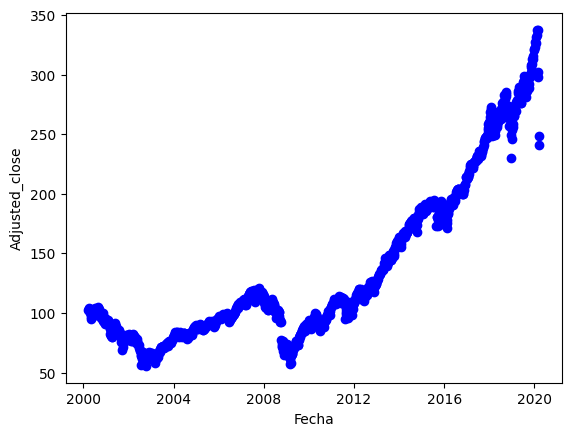

In [32]:
plt.ylabel("Adjusted_close")
plt.xlabel("Fecha")
plt.scatter(datos["fecha"], datos["adjusted_close"], color="blue")

# Regresion Lineal del SPY

In [33]:
regresion = linear_model.LinearRegression()

# Convertir la fecha a valores numéricos
#datos['fecha'] = datos['fecha'].apply(lambda x: x.timestamp())

fechas = datos['fecha'].apply(lambda x: x.timestamp()).values.reshape(-1,1)
fechas

array([[9.5359680e+08],
       [9.5420160e+08],
       [9.5480640e+08],
       ...,
       [1.5833664e+09],
       [1.5839712e+09],
       [1.5845760e+09]])

In [34]:
modelo = regresion.fit(fechas, datos["adjusted_close"])
print("Interseccion (b):", modelo.intercept_)
print("Pendiente (m):", modelo.coef_)

Interseccion (b): -275.5252566599228
Pendiente (m): [3.24887169e-07]


# Graficar recta de regresion lineal

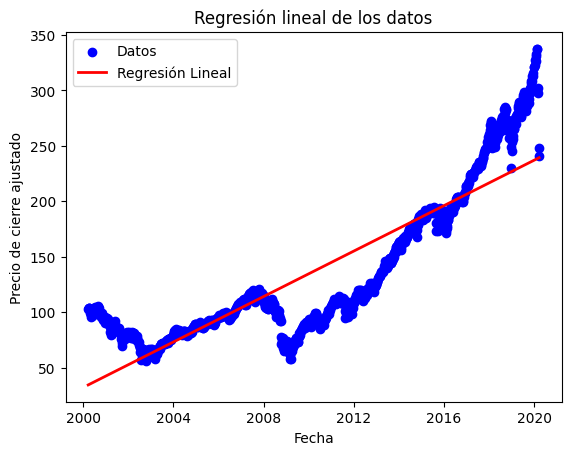

In [35]:
# Visualizar los datos y la línea de regresión
plt.scatter(datos['fecha'], datos['adjusted_close'], color='blue', label='Datos')
plt.plot(datos['fecha'], modelo.predict(fechas), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.title('Regresión lineal de los datos')
plt.legend()
plt.show()
